<a href="https://colab.research.google.com/github/RohanAlexander/japanese_dictionaries/blob/master/kraken_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kraken

     |████████████████████████████████| 645kB 2.9MB/s 
     |████████████████████████████████| 3.4MB 12.9MB/s 
  Created wheel for attr: filename=attr-0.3.1-cp36-none-any.whl size=2458 sha256=ce06278fcc3e208a755e4ff4650ba5f0b448d4fc7023b41540b549059c800ce2
  Stored in directory: /root/.cache/pip/wheels/f0/96/9b/1f8892a707d17095b5a6eab0275da9d39e68e03a26aee2e726
Successfully built attr


Before we begin, upload an image file of desired text along with en_best.mlmodel file (found [here](https://github.com/mittagessen/kraken/issues/120))

Now we binarize the image:

In [2]:
!kraken -i image.tif bw.png binarize

Binarizing	✓


Convert binarized image to txt file:

In [3]:
!kraken -i bw.png image.txt binarize segment ocr -m en_best.mlmodel

2020-10-17 18:53:21.546380: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading RNN default	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmpq7435bey	✓


Or, we can binarize and convert to txt file in one step:

In [4]:
!kraken -i image.tif onestep_image.txt binarize segment ocr -m en_best.mlmodel


2020-10-17 18:53:33.486191: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading RNN default	✓
Binarizing	✓
Segmenting	✓
Processing  [####################################]  100%          
Writing recognition results for /tmp/tmpnnxppwjy	✓


Get a json file of the spacing/line boundaries

In [ ]:
!kraken -i bw.png lines.json segment

2020-10-16 18:05:00.391154: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Segmenting	✓


In [ ]:
!ketos transcribe -o output.html bw.png #get html output of boundaries

2020-10-16 18:05:15.164856: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Reading images  [####################################]  100%
Writing output✓


plot the boundaries

In [ ]:
from kraken import pageseg

In [ ]:
def show_boxes(img2):
  from PIL import ImageDraw, Image
  with Image.open(img2) as img:
    drawing_object = ImageDraw.Draw(img)
    bounding_boxes = pageseg.segment(img.convert('1'), text_direction = 'horizontal-lr', black_colseps = False)['boxes']
    for box in bounding_boxes:
      drawing_object.rectangle(box, fill = None, outline = 'red')
    return img

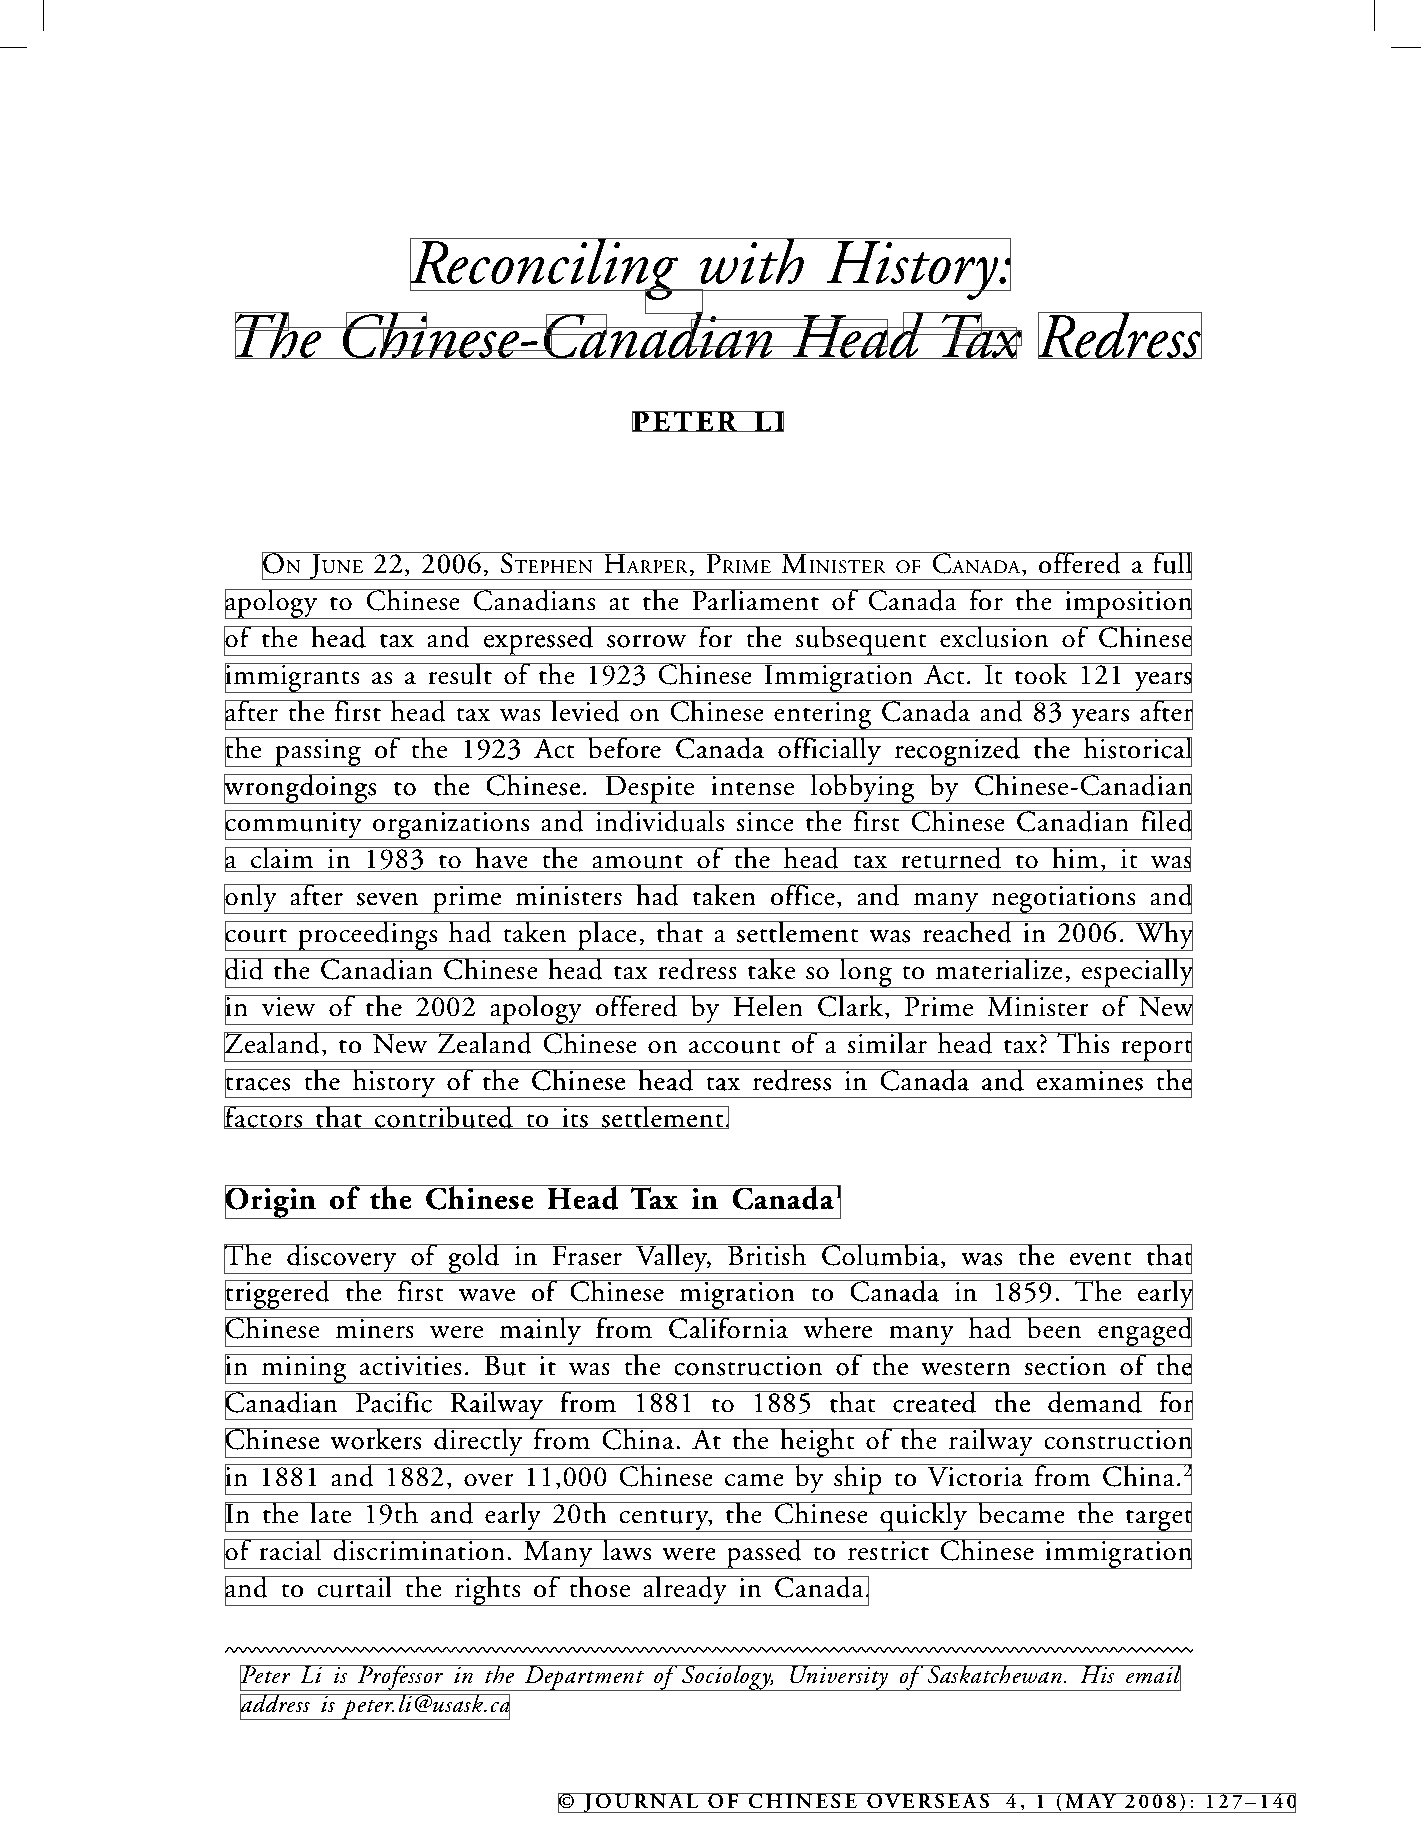

In [ ]:
show_boxes("./bw.png")